Setup:

In [1]:
import matplotlib.pyplot as plt

In [2]:
benchmark_base_path = r'C:\Users\huda\Documents\GitHub\scheduling_model\code\external_test_data\FJSSPinstances\\'
path_30_min = r'C:\Users\huda\Documents\GitHub\scheduling_model\code\reworked_data_model\results\gurobi_results\formatted_results\30_min.txt'
path_60_min = r'C:\Users\huda\Documents\GitHub\scheduling_model\code\reworked_data_model\results\gurobi_results\formatted_results\60_min.txt'

In [3]:
file = open(path_30_min, 'r')
file_content = file.readlines()
results_30_min = [x.split(';') for x in file_content]
file = open(path_60_min, 'r')
file_content = file.readlines()
results_60_min = [x.split(';') for x in file_content]

In [4]:
def read_benchmark_file(source, instance):
    if source.startswith('0'):
        target_file = f'Behnke{instance}.fjs'
    elif source.startswith('1'):
        target_file = f'BrandimarteMk{instance}.fjs'
    elif source.startswith('2a'):
        target_file = f'HurinkSdata{instance}.fjs'
    elif source.startswith('2b'):
        target_file = f'HurinkEdata{instance}.fjs'
    elif source.startswith('2c'):
        target_file = f'HurinkRdata{instance}.fjs'
    elif source.startswith('2d'):
        target_file = f'HurinkVdata{instance}.fjs'
    elif source.startswith('3'):
        target_file = f'DPpaulli{instance}.fjs'
    elif source.startswith('4'):
        target_file = f'ChambersBarnes{instance}.fjs'
    elif source.startswith('5'):
        target_file = f'Kacem{instance}.fjs'
    elif source.startswith('6'):
        target_file = f'Fattahi{instance}.fjs'
    path = benchmark_base_path + f'{source}\\{target_file}'
    return open(path, 'r').readlines()

In [5]:
def translate(columns, limit):
    line = dict()
    line['source'] = columns[0]
    line['instance'] = int(columns[1])
    line['best_objective'] = float(columns[2])
    line['gap'] = float(columns[3])
    line['status'] = int(columns[4])
    line['n_explored'] = int(float(columns[5]))
    line['runtime'] = float(columns[6])
    line['overall_runtime'] = float(columns[7])
    line['setup_time'] = line['overall_runtime'] - line['runtime']
    # add information about the benchmark instance
    benchmark_file = read_benchmark_file(line['source'], line['instance'])
    benchmark_system = benchmark_file[0].split(' ')
    line['n_machines'] = int(benchmark_system[1])
    line['n_jobs'] = int(benchmark_system[0])
    line['average_workstations_per_operation'] = float(benchmark_system[2])
    jobs = benchmark_file[1:]
    line['n_operations'] = sum([int(x.split(' ')[0]) for x in jobs])
    line['average_operations_per_job'] = line['n_operations'] / line['n_jobs']
    line['beta_flexibility'] = line['average_workstations_per_operation']/line['n_machines']
    line['approximate_max_dissimilarity'] = line['n_operations'] + line['average_operations_per_job'] * line['average_workstations_per_operation']
    line['limit'] = limit
    return line    

In [6]:
data_30 = []
data_60 = []

for columns in results_30_min[1:]:
    line = translate(columns, 30)
    data_30.append(line)
for columns in results_60_min[1:]:
    line = translate(columns, 60)
    data_60.append(line)

In [7]:
import pandas as pd
data_all = data_30.copy()
data_all.extend(data_60)
df = pd.DataFrame.from_dict(data_all)

Start working with the data below:

In [8]:
df

,source,instance,best_objective,gap,status,n_explored,runtime,overall_runtime,setup_time,n_machines,n_jobs,average_workstations_per_operation,n_operations,average_operations_per_job,beta_flexibility,approximate_max_dissimilarity,limit
0,0_BehnkeGeiger,1,90.000000,0.000000,2,158083,309.802,309.990282,0.188282,20,10,6.08,50,5.000000,0.304000,80.400000,30
1,0_BehnkeGeiger,2,91.000000,0.000000,2,175969,220.011,220.229788,0.218788,20,10,6.72,50,5.000000,0.336000,83.600000,30
2,0_BehnkeGeiger,3,91.000000,0.000000,2,87914,298.821,299.008287,0.187287,20,10,6.24,50,5.000000,0.312000,81.200000,30
3,0_BehnkeGeiger,4,97.000000,0.041237,9,2042111,1800.017,1800.251823,0.234823,20,10,6.64,50,5.000000,0.332000,83.200000,30
4,0_BehnkeGeiger,5,91.000000,0.032967,9,2708987,1800.014,1800.357862,0.343863,20,10,6.16,50,5.000000,0.308000,80.800000,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,4_ChambersBarnes,19,1125.000000,0.060148,9,284364,3600.096,3600.533674,0.437673,18,15,1.00,225,15.000000,0.055556,240.000000,60
634,4_ChambersBarnes,20,1169.000000,0.000000,2,1023678,3525.489,3525.879204,0.390204,16,15,1.00,225,15.000000,0.062500,240.000000,60
635,5_Kacem,4,10.999999,0.090909,9,1457988,3600.018,3601.064883,1.046883,10,15,10.00,56,3.733333,1.000000,93.333333,60
636,6_Fattahi,19,1080.000000,0.135185,9,4490995,3600.003,3600.799232,0.796232,8,11,2.30,44,4.000000,0.287500,53.200000,60


In [9]:
df.groupby('limit')['limit'].count()

limit
30    402
60    236
Name: limit, dtype: int64

In [10]:
print(f'30: {df[df["limit"] == 30].groupby("status")["status"].count()}')
print(f'60: {df[df["limit"] == 60].groupby("status")["status"].count()}')
print(f'All: {df.groupby("status")["status"].count()}')

30: status
2    166
9    236
Name: status, dtype: int64
60: status
2      7
9    229
Name: status, dtype: int64
All: status
2    173
9    465
Name: status, dtype: int64


In [11]:
df.loc[(df['limit'] == 60) & (df['status'] == 2)]

,source,instance,best_objective,gap,status,n_explored,runtime,overall_runtime,setup_time,n_machines,n_jobs,average_workstations_per_operation,n_operations,average_operations_per_job,beta_flexibility,approximate_max_dissimilarity,limit
436,0_BehnkeGeiger,41,87.0,0.000000e+00,2,233744,3163.439,3164.594530,1.155530,60,10,22.24,50,5.0,0.370667,161.2,60
437,0_BehnkeGeiger,42,87.0,5.685491e-07,2,1436937,3248.429,3248.803315,0.374315,60,10,15.68,50,5.0,0.261333,128.4,60
454,1_Brandimarte,4,60.0,3.166667e-09,2,1322241,2200.407,2201.266069,0.859069,8,15,2.00,90,6.0,0.250000,102.0,60
478,2a_Hurink_sdata,25,927.0,0.000000e+00,2,6863699,2192.457,2194.799641,2.342641,10,15,1.00,150,10.0,0.100000,160.0,60
490,2a_Hurink_sdata,39,1268.0,0.000000e+00,2,234465,1866.507,1867.006972,0.499972,15,15,1.00,225,15.0,0.066667,240.0,60
493,2a_Hurink_sdata,42,1233.0,0.000000e+00,2,5849657,3143.625,3144.421495,0.796495,15,15,1.00,225,15.0,0.066667,240.0,60
634,4_ChambersBarnes,20,1169.0,0.000000e+00,2,1023678,3525.489,3525.879204,0.390204,16,15,1.00,225,15.0,0.062500,240.0,60


In [12]:
# check the benchmarks that were successful after 60 minutes but not after 30 minutes to see their gap after 30 minutes
#NOTE: there is probably a way easier way to do this query based on the previous results
success_60 = df.loc[(df['limit'] == 30) & (((df['source'] == '0_BehnkeGeiger') & (df['instance'] == 41)) | ((df['source'] == '0_BehnkeGeiger') & (df['instance'] == 42)) | ((df['source'] == '1_Brandimarte') & (df['instance'] == 4)) | ((df['source'] == '2a_Hurink_sdata') & (df['instance'] == 25)) | ((df['source'] == '2a_Hurink_sdata') & (df['instance'] == 39)) | ((df['source'] == '2a_Hurink_sdata') & (df['instance'] == 42)) | ((df['source'] == '4_ChambersBarnes') & (df['instance'] == 20)))]
success_60

,source,instance,best_objective,gap,status,n_explored,runtime,overall_runtime,setup_time,n_machines,n_jobs,average_workstations_per_operation,n_operations,average_operations_per_job,beta_flexibility,approximate_max_dissimilarity,limit
40,0_BehnkeGeiger,41,87.000000,0.057471,9,114528,1800.042,1801.148670,1.106670,60,10,22.24,50,5.0,0.370667,161.2,30
41,0_BehnkeGeiger,42,86.999999,0.011494,9,712018,1800.034,1800.424584,0.390584,60,10,15.68,50,5.0,0.261333,128.4,30
63,1_Brandimarte,4,60.000000,0.033333,9,1074732,1800.020,1800.223281,0.203281,8,15,2.00,90,6.0,0.250000,102.0,30
99,2a_Hurink_sdata,25,927.000000,0.043150,9,5579887,1800.037,1800.412106,0.375106,10,15,1.00,150,10.0,0.100000,160.0,30
113,2a_Hurink_sdata,39,1268.000000,0.042587,9,223359,1800.101,1800.522278,0.421278,15,15,1.00,225,15.0,0.066667,240.0,30
116,2a_Hurink_sdata,42,1233.000000,0.066504,9,3205012,1800.047,1800.625239,0.578239,15,15,1.00,225,15.0,0.066667,240.0,30
376,4_ChambersBarnes,20,1170.000000,0.068376,9,703616,1800.079,1800.423013,0.344013,16,15,1.00,225,15.0,0.062500,240.0,30


In [13]:
print(f'Mean Gap: {success_60["gap"].mean()}')
print(f'Var Gap: {success_60["gap"].var()}')
print(f'Std Gap: {success_60["gap"].std()}')
print(f'Max Gap: {success_60["gap"].max()}')
print(f'Min Gap: {success_60["gap"].min()}')

Mean Gap: 0.04613086678185619
Var Gap: 0.000403909343113591
Std Gap: 0.02009749594137516
Max Gap: 0.06837606837606641
Min Gap: 0.011494244358202708


In [14]:
grouped_df_30 = df[df["limit"] == 30].groupby("status")
grouped_df_60 = df[df["limit"] == 60].groupby("status")

In [15]:
def print_data(df):
    print(f"# Machines: {df['n_machines'].mean()}")
    print(f"# Jobs: {df['n_jobs'].mean()}")
    print(f"# Operations: {df['n_operations'].mean()}")
    print(f"# Flexibility: {df['beta_flexibility'].mean()}")
    print(f"# Approx.Max:Dis.: {df['approximate_max_dissimilarity'].mean()}")


In [16]:
print('30 Minutes:')
print_data(grouped_df_30)


30 Minutes:
# Machines: status
2    10.753012
9    15.453390
Name: n_machines, dtype: float64
# Jobs: status
2     9.885542
9    25.237288
Name: n_jobs, dtype: float64
# Operations: status
2     89.180723
9    192.974576
Name: n_operations, dtype: float64
# Flexibility: status
2    0.273660
9    0.277359
Name: beta_flexibility, dtype: float64
# Approx.Max:Dis.: status
2    111.164970
9    220.996787
Name: approximate_max_dissimilarity, dtype: float64


In [17]:
print('60 Minutes:')
print_data(grouped_df_60)

60 Minutes:
# Machines: status
2    26.285714
9    15.122271
Name: n_machines, dtype: float64
# Jobs: status
2    13.571429
9    25.593886
Name: n_jobs, dtype: float64
# Operations: status
2    145.000000
9    194.441048
Name: n_operations, dtype: float64
# Flexibility: status
2    0.168262
9    0.280694
Name: beta_flexibility, dtype: float64
# Approx.Max:Dis.: status
2    181.657143
9    222.199309
Name: approximate_max_dissimilarity, dtype: float64


In [18]:
import seaborn as sns

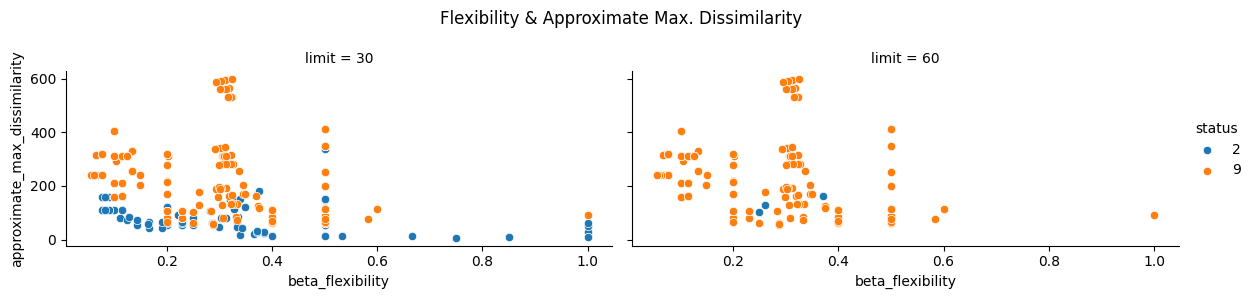

In [19]:
fg = sns.FacetGrid(data=df, hue='status',  aspect=2, col='limit')
fg.fig.suptitle('Flexibility & Approximate Max. Dissimilarity')
fg.map(sns.scatterplot, 'beta_flexibility', 'approximate_max_dissimilarity').add_legend() #NOTE: used sns.scatterplot instead of plt.scatter

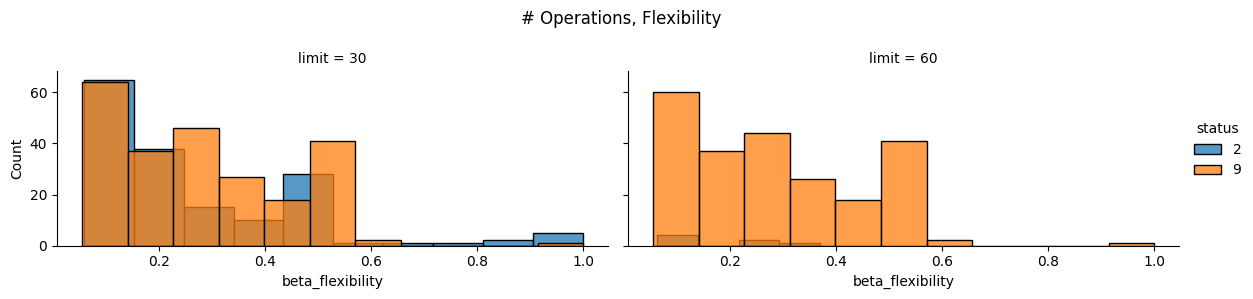

In [20]:
fg = sns.FacetGrid(data=df, hue='status', aspect=2, col='limit')
fg.fig.suptitle("# Operations, Flexibility")
fg.map_dataframe(sns.histplot, x='beta_flexibility').add_legend()

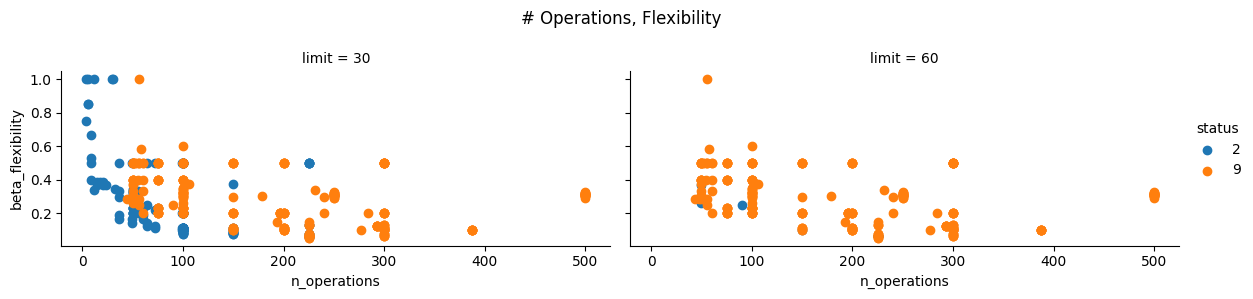

In [21]:
fg = sns.FacetGrid(data=df, hue='status', aspect=2, col='limit')
fg.fig.suptitle("# Operations, Flexibility")
fg.map(plt.scatter, 'n_operations', 'beta_flexibility').add_legend()

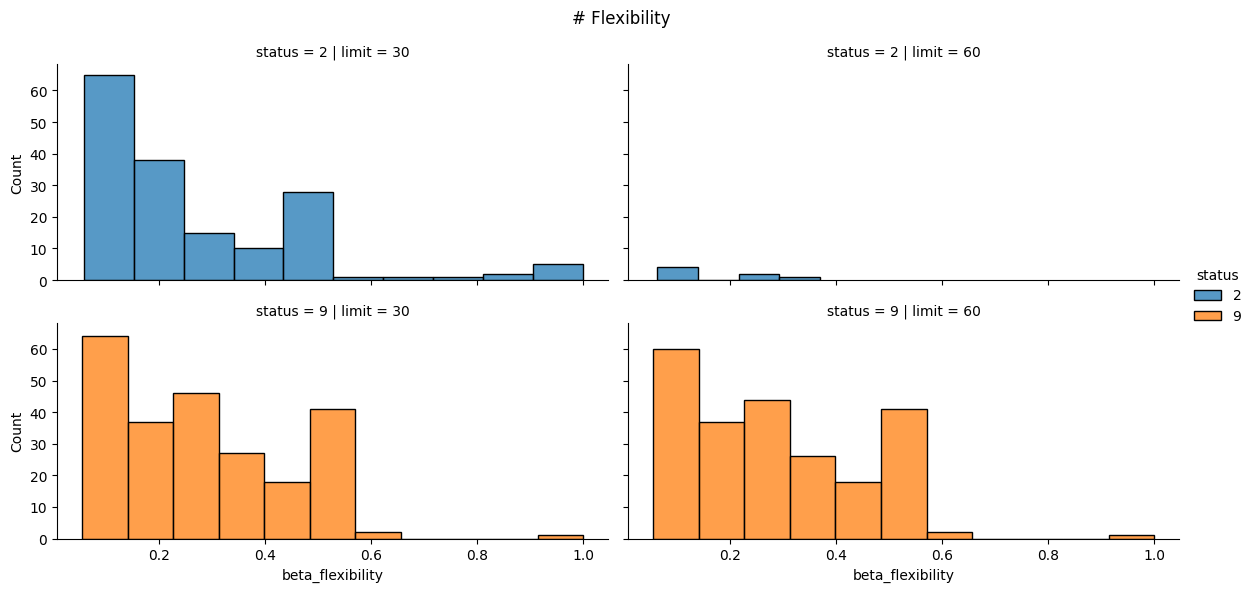

In [22]:
fg = sns.FacetGrid(data=df, hue='status', aspect=2, col='limit', row='status')
fg.fig.suptitle("# Flexibility")
fg.map_dataframe(sns.histplot, x='beta_flexibility').add_legend()

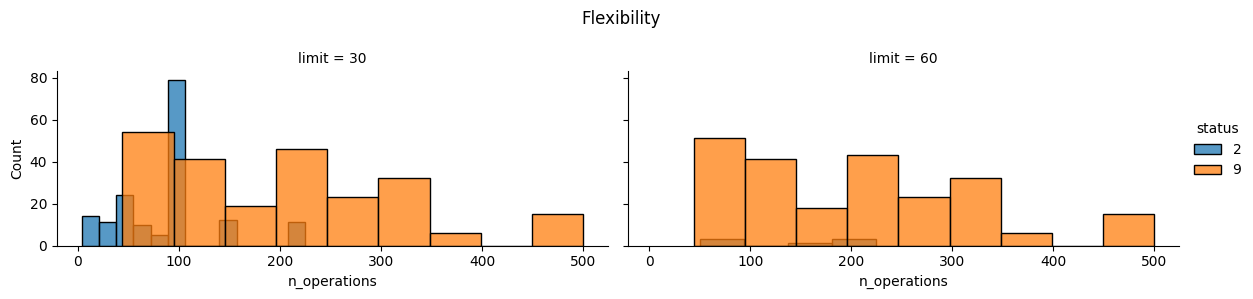

In [23]:
fg = sns.FacetGrid(data=df, hue='status', aspect=2, col='limit')
fg.fig.suptitle("Flexibility")
fg.map_dataframe(sns.histplot, x='n_operations').add_legend()

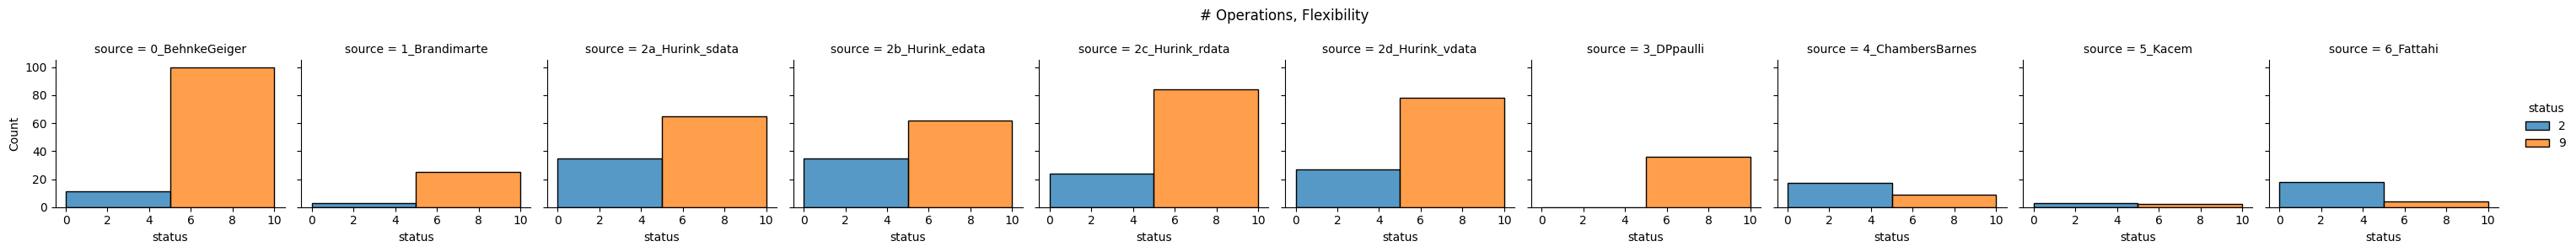

In [24]:
fg = sns.FacetGrid(data=df, hue='status', aspect=1, col='source')
fg.fig.suptitle("# Operations, Flexibility")
fg.map_dataframe(sns.histplot, x='status', binwidth=5, binrange=(0, 10)).add_legend()

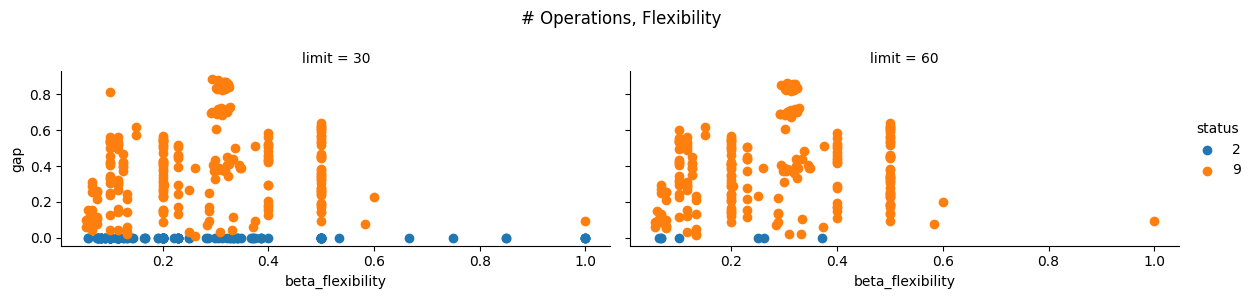

In [25]:
fg = sns.FacetGrid(data=df, hue='status', aspect=2, col='limit')
fg.fig.suptitle("# Operations, Flexibility")
fg.map(plt.scatter, 'beta_flexibility', 'gap').add_legend()

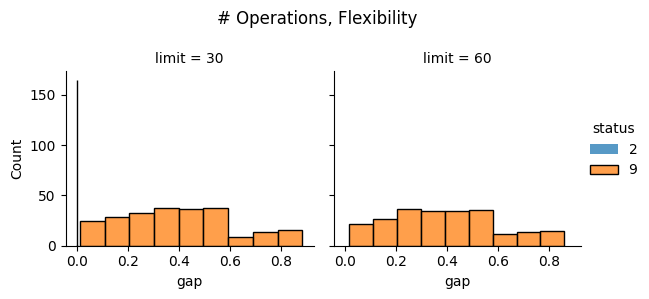

In [26]:
fg = sns.FacetGrid(data=df, hue='status', aspect=1, col='limit')
fg.fig.suptitle("# Operations, Flexibility")
fg.map_dataframe(sns.histplot, x='gap').add_legend()

In [27]:
print(f'{df.loc[(df["limit"] == 30)][df["gap"] < 0.1].count()}')

source                                189
instance                              189
best_objective                        189
gap                                   189
status                                189
n_explored                            189
runtime                               189
overall_runtime                       189
setup_time                            189
n_machines                            189
n_jobs                                189
average_workstations_per_operation    189
n_operations                          189
average_operations_per_job            189
beta_flexibility                      189
approximate_max_dissimilarity         189
limit                                 189
dtype: int64


C:\Users\huda\AppData\Local\Temp\ipykernel_14576\481850337.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(f'{df.loc[(df["limit"] == 30)][df["gap"] < 0.1].count()}')


In [28]:
df.loc[(df["limit"] == 30)][df["gap"] < 0.1]

C:\Users\huda\AppData\Local\Temp\ipykernel_14576\2587666203.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.loc[(df["limit"] == 30)][df["gap"] < 0.1]


,source,instance,best_objective,gap,status,n_explored,runtime,overall_runtime,setup_time,n_machines,n_jobs,average_workstations_per_operation,n_operations,average_operations_per_job,beta_flexibility,approximate_max_dissimilarity,limit
0,0_BehnkeGeiger,1,90.0,0.000000,2,158083,309.802,309.990282,0.188282,20,10,6.08,50,5.0,0.304000,80.4,30
1,0_BehnkeGeiger,2,91.0,0.000000,2,175969,220.011,220.229788,0.218788,20,10,6.72,50,5.0,0.336000,83.6,30
2,0_BehnkeGeiger,3,91.0,0.000000,2,87914,298.821,299.008287,0.187287,20,10,6.24,50,5.0,0.312000,81.2,30
3,0_BehnkeGeiger,4,97.0,0.041237,9,2042111,1800.017,1800.251823,0.234823,20,10,6.64,50,5.0,0.332000,83.2,30
4,0_BehnkeGeiger,5,91.0,0.032967,9,2708987,1800.014,1800.357862,0.343863,20,10,6.16,50,5.0,0.308000,80.8,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,6_Fattahi,14,554.0,0.000000,2,8215,1.327,1.359057,0.032057,7,7,2.70,21,3.0,0.385714,29.1,30
396,6_Fattahi,15,514.0,0.000000,2,1514,0.359,0.374910,0.015910,7,7,2.60,21,3.0,0.371429,28.8,30
397,6_Fattahi,16,634.0,0.000000,2,84328,12.107,12.141869,0.034869,7,8,2.60,24,3.0,0.371429,31.8,30
398,6_Fattahi,17,879.0,0.000000,2,93502,16.433,16.464900,0.031899,7,8,2.40,32,4.0,0.342857,41.6,30


In [29]:
data = df.loc[(df["limit"] == 30)][df["gap"] < 0.1]
data[["source", "instance", "gap", "best_objective"]]

C:\Users\huda\AppData\Local\Temp\ipykernel_14576\1098926076.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = df.loc[(df["limit"] == 30)][df["gap"] < 0.1]


,source,instance,gap,best_objective
0,0_BehnkeGeiger,1,0.000000,90.0
1,0_BehnkeGeiger,2,0.000000,91.0
2,0_BehnkeGeiger,3,0.000000,91.0
3,0_BehnkeGeiger,4,0.041237,97.0
4,0_BehnkeGeiger,5,0.032967,91.0
...,...,...,...,...
395,6_Fattahi,14,0.000000,554.0
396,6_Fattahi,15,0.000000,514.0
397,6_Fattahi,16,0.000000,634.0
398,6_Fattahi,17,0.000000,879.0


In [30]:
for index, row in data.iterrows():
    print(f'{row["source"]};{row["instance"]};{row["gap"]};{row["best_objective"] if row["gap"] == 0 else 0}')

0_BehnkeGeiger;1;0.0;90.0
0_BehnkeGeiger;2;0.0;91.0
0_BehnkeGeiger;3;0.0;91.0
0_BehnkeGeiger;4;0.04123711330519641;0
0_BehnkeGeiger;5;0.03296703286926646;0
0_BehnkeGeiger;21;0.09090909081714858;0
0_BehnkeGeiger;22;0.0;87.0
0_BehnkeGeiger;23;0.0;85.0
0_BehnkeGeiger;24;0.0;87.0
0_BehnkeGeiger;25;0.06896550686218189;0
0_BehnkeGeiger;41;0.05747126427247953;0
0_BehnkeGeiger;42;0.011494244358202708;0
0_BehnkeGeiger;43;0.0;86.0
0_BehnkeGeiger;44;0.0;84.0
0_BehnkeGeiger;45;0.0;87.0
1_Brandimarte;1;0.0;40.0
1_Brandimarte;2;0.0740740144124689;0
1_Brandimarte;3;0.0;203.9999998995203
1_Brandimarte;4;0.03333333323504763;0
2a_Hurink_sdata;1;1.0181819024265601e-10;0
2a_Hurink_sdata;2;0.0;930.0
2a_Hurink_sdata;4;0.0;665.9999998664963
2a_Hurink_sdata;5;0.0;654.9999999343999
2a_Hurink_sdata;6;0.0;596.9999999999998
2a_Hurink_sdata;7;0.0;589.999999940898
2a_Hurink_sdata;8;0.0;593.0
2a_Hurink_sdata;19;0.0;944.9999999999989
2a_Hurink_sdata;20;0.0;784.0
2a_Hurink_sdata;21;0.0;847.9999999999848
2a_Hurink_sdat

In [31]:
df.loc[df['source'] == '0_BehnkeGeiger']

,source,instance,best_objective,gap,status,n_explored,runtime,overall_runtime,setup_time,n_machines,n_jobs,average_workstations_per_operation,n_operations,average_operations_per_job,beta_flexibility,approximate_max_dissimilarity,limit
0,0_BehnkeGeiger,1,90.0,0.000000,2,158083,309.802,309.990282,0.188282,20,10,6.08,50,5.0,0.304000,80.40,30
1,0_BehnkeGeiger,2,91.0,0.000000,2,175969,220.011,220.229788,0.218788,20,10,6.72,50,5.0,0.336000,83.60,30
2,0_BehnkeGeiger,3,91.0,0.000000,2,87914,298.821,299.008287,0.187287,20,10,6.24,50,5.0,0.312000,81.20,30
3,0_BehnkeGeiger,4,97.0,0.041237,9,2042111,1800.017,1800.251823,0.234823,20,10,6.64,50,5.0,0.332000,83.20,30
4,0_BehnkeGeiger,5,91.0,0.032967,9,2708987,1800.014,1800.357862,0.343863,20,10,6.16,50,5.0,0.308000,80.80,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,0_BehnkeGeiger,56,461.0,0.832972,9,2971,3600.954,3655.988449,55.034449,60,100,18.52,500,5.0,0.308667,592.60,60
449,0_BehnkeGeiger,57,477.0,0.828092,9,1415,3601.643,3657.629765,55.986765,60,100,18.70,500,5.0,0.311667,593.50,60
450,0_BehnkeGeiger,58,448.0,0.834821,9,1399,3601.268,3661.925622,60.657622,60,100,19.50,500,5.0,0.325000,597.50,60
451,0_BehnkeGeiger,59,440.0,0.825000,9,3158,3601.649,3655.104556,53.455556,60,100,18.22,500,5.0,0.303667,591.10,60


In [32]:
df.loc[df['source'] == '3_DPpaulli']

,source,instance,best_objective,gap,status,n_explored,runtime,overall_runtime,setup_time,n_machines,n_jobs,average_workstations_per_operation,n_operations,average_operations_per_job,beta_flexibility,approximate_max_dissimilarity,limit
339,3_DPpaulli,1,2673.000000,0.412645,9,342028,1800.038,1800.460012,0.422012,5,10,1.0,196,19.600000,0.200,215.600000,30
340,3_DPpaulli,2,2348.000000,0.383667,9,208800,1800.032,1801.204115,1.172115,5,10,1.0,196,19.600000,0.200,215.600000,30
341,3_DPpaulli,3,2316.000000,0.398964,9,229425,1800.064,1802.047668,1.983668,5,10,1.0,196,19.600000,0.200,215.600000,30
342,3_DPpaulli,4,2701.000000,0.428360,9,345270,1800.032,1800.954142,0.922142,5,10,1.0,196,19.600000,0.200,215.600000,30
343,3_DPpaulli,5,2399.000000,0.408504,9,53094,1800.064,1801.250946,1.186946,5,10,1.0,196,19.600000,0.200,215.600000,30
344,3_DPpaulli,6,2316.000000,0.419689,9,60009,1800.063,1801.844558,1.781558,5,10,1.0,196,19.600000,0.200,215.600000,30
345,3_DPpaulli,7,2572.000000,0.401244,9,74741,1800.064,1800.985416,0.921416,8,15,1.0,293,19.533333,0.125,312.533333,30
346,3_DPpaulli,8,2305.000000,0.392625,9,131758,1800.102,1802.523793,2.421793,8,15,1.0,293,19.533333,0.125,312.533333,30
347,3_DPpaulli,9,2220.000000,0.369369,9,12879,1800.157,1806.452889,6.295889,8,15,1.0,293,19.533333,0.125,312.533333,30
348,3_DPpaulli,10,2624.000000,0.424784,9,241102,1800.095,1801.047902,0.952902,8,15,1.0,293,19.533333,0.125,312.533333,30


In [35]:
df.loc[df['source'] == '0_BehnkeGeiger'].loc[df['status'] == 2]

,source,instance,best_objective,gap,status,n_explored,runtime,overall_runtime,setup_time,n_machines,n_jobs,average_workstations_per_operation,n_operations,average_operations_per_job,beta_flexibility,approximate_max_dissimilarity,limit
0,0_BehnkeGeiger,1,90.0,0.000000e+00,2,158083,309.802,309.990282,0.188282,20,10,6.08,50,5.0,0.304000,80.4,30
1,0_BehnkeGeiger,2,91.0,0.000000e+00,2,175969,220.011,220.229788,0.218788,20,10,6.72,50,5.0,0.336000,83.6,30
2,0_BehnkeGeiger,3,91.0,0.000000e+00,2,87914,298.821,299.008287,0.187287,20,10,6.24,50,5.0,0.312000,81.2,30
21,0_BehnkeGeiger,22,87.0,0.000000e+00,2,107355,594.127,594.658480,0.531480,40,10,13.12,50,5.0,0.328000,115.6,30
22,0_BehnkeGeiger,23,85.0,0.000000e+00,2,74280,304.820,305.272419,0.452419,40,10,13.92,50,5.0,0.348000,119.6,30
23,0_BehnkeGeiger,24,87.0,0.000000e+00,2,691451,1222.687,1222.983173,0.296173,40,10,11.28,50,5.0,0.282000,106.4,30
42,0_BehnkeGeiger,43,86.0,0.000000e+00,2,62715,763.203,763.765833,0.562833,60,10,19.28,50,5.0,0.321333,146.4,30
43,0_BehnkeGeiger,44,84.0,0.000000e+00,2,123617,1235.629,1236.192022,0.563022,60,10,19.60,50,5.0,0.326667,148.0,30
44,0_BehnkeGeiger,45,87.0,0.000000e+00,2,263529,1581.746,1582.370559,0.624558,60,10,20.40,50,5.0,0.340000,152.0,30
436,0_BehnkeGeiger,41,87.0,0.000000e+00,2,233744,3163.439,3164.594530,1.155530,60,10,22.24,50,5.0,0.370667,161.2,60


In [37]:
df.loc[df['source'] == '1_Brandimarte'].loc[df['status'] == 2]

,source,instance,best_objective,gap,status,n_explored,runtime,overall_runtime,setup_time,n_machines,n_jobs,average_workstations_per_operation,n_operations,average_operations_per_job,beta_flexibility,approximate_max_dissimilarity,limit
60,1_Brandimarte,1,40.0,0.000000e+00,2,6401,8.373,9.029140,0.656140,6,10,2.0,55,5.5,0.333333,66.0,30
62,1_Brandimarte,3,204.0,0.000000e+00,2,8325,316.350,317.614860,1.264859,8,15,3.0,150,10.0,0.375000,180.0,30
454,1_Brandimarte,4,60.0,3.166667e-09,2,1322241,2200.407,2201.266069,0.859069,8,15,2.0,90,6.0,0.250000,102.0,60
